Text(0.5, 1.0, 'Original image')

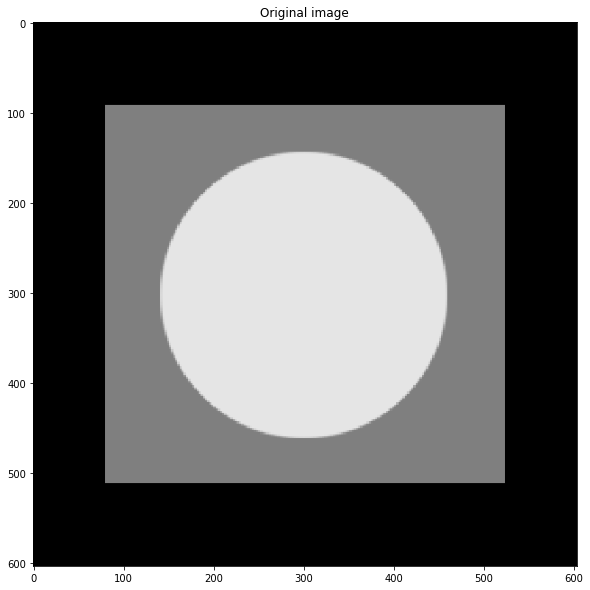

In [16]:
%matplotlib inline
from IPython.display import display, Math, Latex
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://media.cheggcdn.com/media%2F2a9%2F2a90c92c-db23-4c83-ad8a-ae394c72a576%2Fphp2bN8Kd.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")

In [17]:
def add_gaussian_noise(img):
  mean = 8
  var = 16
  sigma = var ** 1.2
  gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 

  noisy_image = np.zeros(img.shape, np.float32)

  if len(img.shape) == 2:
    noisy_image = img + gaussian
  else:
    noisy_image[:, :, 0] = img[:, :, 0] + gaussian
    noisy_image[:, :, 1] = img[:, :, 1] + gaussian
    noisy_image[:, :, 2] = img[:, :, 2] + gaussian

  cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
  noisy_image = noisy_image.astype(np.uint8)
  return noisy_image

Text(0.5, 1.0, 'Noisy Image')

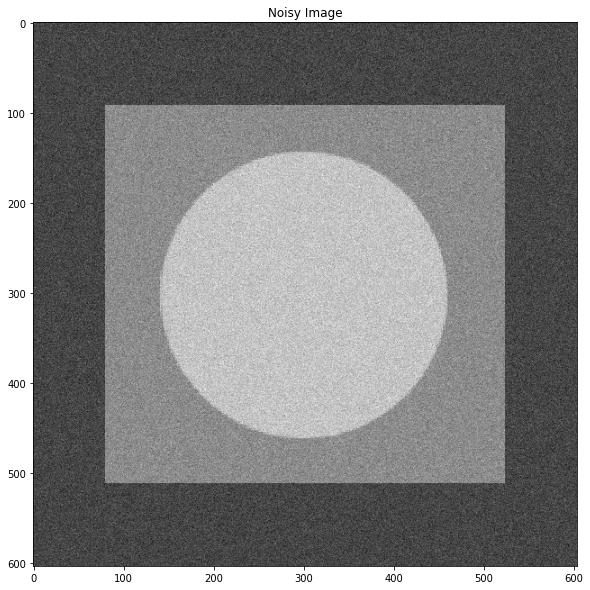

In [18]:
img = np.asarray(img)
noise_image = add_gaussian_noise(img)

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(noise_image, cmap='gray', vmin=0, vmax=255)
plt.title("Noisy Image")